In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, GRU
import os

In [13]:
df = pd.read_csv('INTC.csv')
print(df.head())

         Date   Open   High    Low  Close    Volume  Name
0  2006-01-03  25.19  25.64  24.90  25.57  56409085  INTC
1  2006-01-04  25.60  25.94  25.59  25.91  46189650  INTC
2  2006-01-05  25.93  26.47  25.91  26.27  54893195  INTC
3  2006-01-06  26.48  26.63  26.21  26.31  45703307  INTC
4  2006-01-09  26.39  26.51  26.09  26.47  39461729  INTC


In [14]:
df = df['Close'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(3019, 1)


array([[25.57],
       [25.91],
       [26.27],
       [26.31],
       [26.47]])

In [15]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(2415, 1)
(654, 1)


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.52715905],
       [0.54044549],
       [0.55451348],
       [0.55607659],
       [0.56232903]])

In [17]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.87456038],
       [0.85267683],
       [0.82805784],
       [0.80695584],
       [0.79054318]])

In [18]:
# Since LSTMs store long term memory state, we create a data structure with 50 timesteps and 1 output
# So for each element of training set, we have 50 previous training set elements 

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [19]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.52715905, 0.54044549, 0.55451348, 0.55607659, 0.56232903,
        0.54865182, 0.54943337, 0.54279015, 0.53575615, 0.52520516,
        0.41109809, 0.40328253, 0.37827276, 0.36225088, 0.35951544,
        0.35677999, 0.36772177, 0.37475576, 0.37397421, 0.35873388,
        0.37006643, 0.35638921, 0.33841344, 0.33333333, 0.335678  ,
        0.335678  , 0.34857366, 0.35990621, 0.35365377, 0.36303243,
        0.36225088, 0.36225088, 0.33333333, 0.33372411, 0.31535756,
        0.32082845, 0.32356389, 0.32981633, 0.33294256, 0.34075811,
        0.328644  , 0.32200078, 0.32121923, 0.31184056, 0.30988667,
        0.29972646, 0.30363423, 0.2989449 , 0.30011723, 0.30636968]])

In [20]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.87456038, 0.85267683, 0.82805784, 0.80695584, 0.79054318,
        0.77217663, 0.75107464, 0.74912075, 0.77139508, 0.77256741,
        0.75185619, 0.75459164, 0.76436108, 0.77647519, 0.79327862,
        0.78116452, 0.78858929, 0.7815553 , 0.77491208, 0.7780383 ,
        0.74013286, 0.71551387, 0.71668621, 0.70730754, 0.72215709,
        0.70183665, 0.69636577, 0.68073466, 0.65846034, 0.667839  ,
        0.68972255, 0.68659633, 0.68815944, 0.69636577, 0.67956233,
        0.66510356, 0.65025401, 0.64556467, 0.64556467, 0.62446268,
        0.63579523, 0.65963267, 0.66158656, 0.65767878, 0.65924189,
        0.66314967, 0.66627589, 0.66588511, 0.66158656, 0.65650645]])

In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
model = Sequential()
model.add(GRU(units=96, return_sequences=True,activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=96,activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=96,activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=96,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
history = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
2365/2365 [==============================] - 22s 9ms/step - loss: 0.0412
Epoch 2/50
2365/2365 [==============================] - 16s 7ms/step - loss: 0.0041
Epoch 3/50
2365/2365 [==============================] - 15s 6ms/step - loss: 0.0031
Epoch 4/50
2365/2365 [==============================] - 18s 8ms/step - loss: 0.0031
Epoch 5/50
2365/2365 [==============================] - 18s 8ms/step - loss: 0.0027
Epoch 6/50
2365/2365 [==============================] - 17s 7ms/step - loss: 0.0031
Epoch 7/50
2365/2365 [==============================] - 18s 8ms/step - loss: 0.0027
Epoch 8/50
2365/2365 [==============================] - 17s 7ms/step - loss: 0.0025
Epoch 9/50
2365/2365 [==============================] - 15s 6ms/step - loss: 0.0025
Epoch 10/50
2365/2365 [==============================] - 15s 7ms/step - loss: 0.0026
Epoch 11/50
2365/2365 [==============================] - 15s 6ms/step - loss: 0.0025
Epoch 12/50
2365/2365 [==============================] - 16s 7ms/step - lo

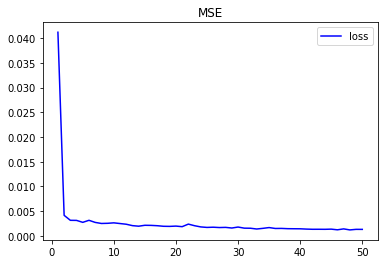

In [25]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='loss')
plt.title('MSE')
plt.legend()
plt.show()

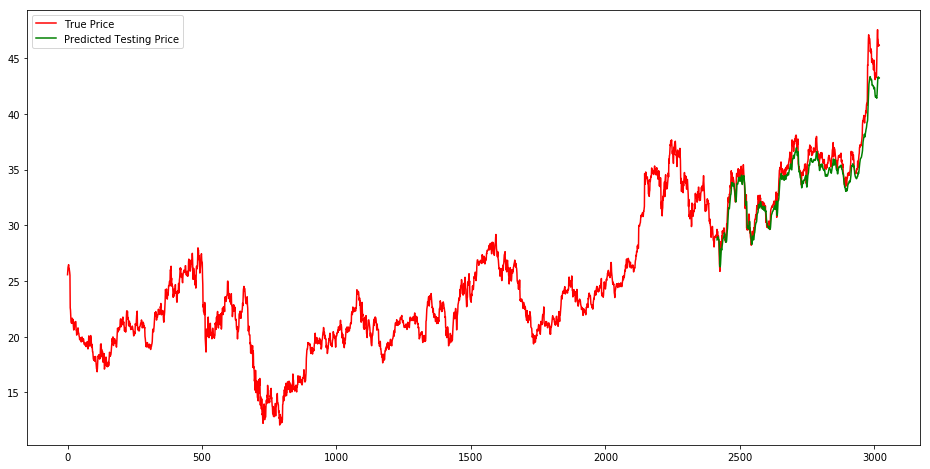

In [26]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(16,8))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='green', label='Predicted Testing Price')
plt.legend()

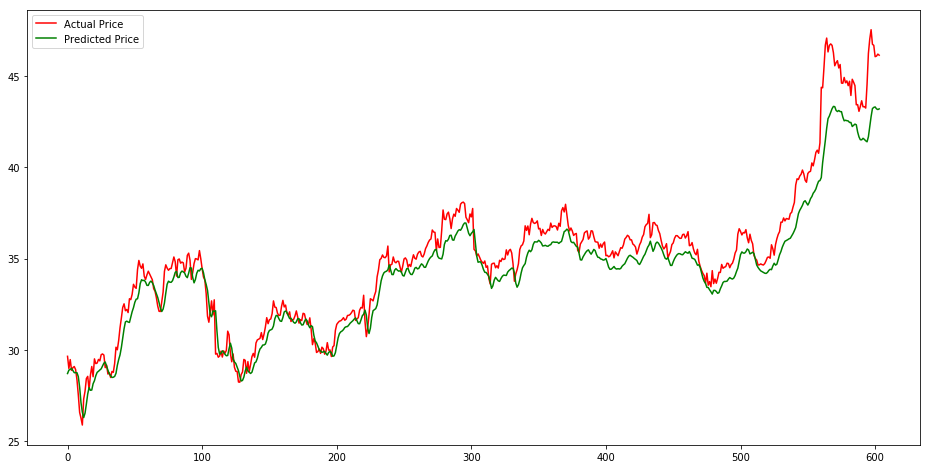

In [27]:

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(y_test_scaled, color='red', label='Actual Price')
plt.plot(predictions, color='green', label='Predicted Price')
plt.legend()

In [28]:
import math
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [29]:
return_rmse(y_test_scaled,predictions)

The root mean squared error is 1.2112369921336237.
